<a href="https://colab.research.google.com/github/joshuergc/Miscellaneous/blob/main/analyzing_crypto_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A time series analysis of the Crypto Market** 

**OPTIONAL:** If you want to update to another version of a module, you can do it like you would do it using bash commands.

In [2]:
!pip3 install --upgrade pandas

In [3]:
!pip3 install --upgrade matplotlib

In [4]:
!pip install --upgrade seaborn

We will import three modules; **pandas**, **matplotlib.pyplot**, and **seaborn**. The first one will be used to create a dataframe that will be convert into a time series, and the last two will be use to create visualizations of the data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The first thing that we have to do in any project is get the data. The [Crypto Data Download "Binance Data"](https://www.cryptodatadownload.com/data/binance/) website seems to offer reliable and uptodate data from several crypto offers. This the data source that we will be using in this project.

In the next code cell we wil download the data. The first step is to go to the previous website and copy the url from the data that you want to ingest, and then add the url as shown below.



```
!wget -O name_of_the_file url_of_the_file
```

In [69]:
!wget --no-check-certificate -O /content/BTC_USDT.csv https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_minute.csv

--2022-01-25 01:30:29--  https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_minute.csv
Resolving www.cryptodatadownload.com (www.cryptodatadownload.com)... 35.173.69.207
Connecting to www.cryptodatadownload.com (www.cryptodatadownload.com)|35.173.69.207|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 150005873 (143M) [text/csv]
Saving to: ‘/content/BTC_USDT.csv’

/content/BTC_USDT.c 100%[===================>] 143.06M  50.6MB/s    in 2.8s    

2022-01-25 01:30:32 (50.6 MB/s) - ‘/content/BTC_USDT.csv’ saved [150005873/150005873]



Well, now it's time to create the dataframe with the csv file. We will skip the first row of the csv file because it's only the name of the webpage.

In [70]:
df_old = pd.read_csv("/content/BTC_USDT.csv", skiprows = [0])

In [46]:
#OPTIONAL
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Be careful because these way may present risks because the webpage from which the data is being download is not verified.
#If the webpage is verified you don't need to run the code above, only the below one

df_old = pd.read_csv("https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_minute.csv", skiprows=[0])

We need to make sure we know the name of the columns so we can access to them properly



In [71]:
df_old.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USDT', 'tradecount'],
      dtype='object')

Now, we will create a new dataframe with only two columns **(Date, Price)**, so that we can focus on those things only. And we will also select only the last year and the current year of data **(2020 and 2021)**.

In [9]:
temporal = []
for i in range(len(df_old)):
  if ("2021" in df_old["date"][i]) or ("2022" in df_old["date"][i]):
    temporal.append([df_old["date"][i], df_old["close"][i]])

In [10]:
df_new = pd.DataFrame(temporal, columns = ["Date", "Price"])
del temporal, df_old
print(len(df_new))

553878


We have now created a new dataframe based on the previous one with only two columns, now we will save it in a csv file.

In [11]:
df_new.to_csv("BTC_USDT_1.csv", index = False)

So far, we have managed to download the data, get rid of unnecessary columns and select the dates (from 2021 to the 24 of Jan 2022). So, we have a shorter dataframe, and now we will do a little feature engineering to split the column date in **(year, month, day, hour, minute)**.

Before that, we will visualize the data.

In [73]:
df_new.head(5)

,Date,Price
0,2022-01-24 03:35:00,35265.28
1,2022-01-24 03:34:00,35275.27
2,2022-01-24 03:33:00,35236.97
3,2022-01-24 03:32:00,35257.26
4,2022-01-24 03:31:00,35235.56


In [74]:
df_new["Year"] = [int(df_new["Date"][i][0:4]) for i in range(len(df_new))]
df_new["Month"] = [int(df_new["Date"][i][5:7]) for i in range(len(df_new))]
df_new["Day"] = [int(df_new["Date"][i][8:10]) for i in range(len(df_new))]
df_new["Hour"] = [int(df_new["Date"][i][11:13]) for i in range(len(df_new))]
df_new["Minute"] = [int(df_new["Date"][i][14:16]) for i in range(len(df_new))]

#If you want to run queries this the best option because it casts the type from strings to integers, or you can also use the following code:
#df["Year"] = pd.to_numeric(df["Year"]) for every single one of the columns that you want to convert.

We have concluded the feature engineering of the Date column, so now it's time to visualize it.

In [75]:
df_new.head(10)

,Date,Price,Year,Month,Day,Hour,Minute
0,2022-01-24 03:35:00,35265.28,2022,1,24,3,35
1,2022-01-24 03:34:00,35275.27,2022,1,24,3,34
2,2022-01-24 03:33:00,35236.97,2022,1,24,3,33
3,2022-01-24 03:32:00,35257.26,2022,1,24,3,32
4,2022-01-24 03:31:00,35235.56,2022,1,24,3,31
5,2022-01-24 03:30:00,35228.81,2022,1,24,3,30
6,2022-01-24 03:29:00,35208.65,2022,1,24,3,29
7,2022-01-24 03:28:00,35233.66,2022,1,24,3,28
8,2022-01-24 03:27:00,35219.99,2022,1,24,3,27
9,2022-01-24 03:26:00,35239.33,2022,1,24,3,26


Now, we will add a column call index, which will start in Jan 1 2021, and end in Jan 24 2022 (Take into account that the csv file has the records for every minute).

In [76]:
temp = len(df_new)
df_new["Index"] = [temp-i for i in range(len(df_new))]
del temp

Time to visualize the data.

In [77]:
df_new.head(10)

,Date,Price,Year,Month,Day,Hour,Minute,Index
0,2022-01-24 03:35:00,35265.28,2022,1,24,3,35,553878
1,2022-01-24 03:34:00,35275.27,2022,1,24,3,34,553877
2,2022-01-24 03:33:00,35236.97,2022,1,24,3,33,553876
3,2022-01-24 03:32:00,35257.26,2022,1,24,3,32,553875
4,2022-01-24 03:31:00,35235.56,2022,1,24,3,31,553874
5,2022-01-24 03:30:00,35228.81,2022,1,24,3,30,553873
6,2022-01-24 03:29:00,35208.65,2022,1,24,3,29,553872
7,2022-01-24 03:28:00,35233.66,2022,1,24,3,28,553871
8,2022-01-24 03:27:00,35219.99,2022,1,24,3,27,553870
9,2022-01-24 03:26:00,35239.33,2022,1,24,3,26,553869


We will create a function that works like a query and returns the column specified.

In [18]:
def row_index(df, str_key, value_expected):
  for i in range(len(df)):
    if df[str_key][i] == value_expected: 
      return i
  raise KeyError("row not in the dataframe")

In [19]:
df_new.loc[row_index(df_new, "Index", 1)]

Date      2021-01-01 00:00:00
Price                28961.66
Year                     2021
Month                      01
Day                        01
Hour                       00
Minute                     00
Index                       1
Name: 553877, dtype: object

In [61]:
#OPTIONAL
#And way easier

#O1
df_new[df_new.Index == 1]

#O2

#df_new.loc[df_new.Index == 1]

#O3

#df_new.tail(1)

,Date,Price,Year,Month,Day,Hour,Minute,Index
553877,2021-01-01 00:00:00,28961.66,2021,01,01,00,00,1


That's not the easiest way of doing it, if you want to check the last part of dataframe you can use the tail method (which is essentially the same as head). It's purpose is to show you that you can create function involving dataframes, to run queries in your data try O1 with bitwise operators like in the following example.

In [83]:
df_new[(df_new["Price"] > 1000) & (df_new["Day"] == 10)]

,Price,Year,Month,Day,Hour,Minute,Index
18936,1185.939542,2022,1,10,23,59,534942
18937,1186.401753,2022,1,10,23,58,534941
18938,1186.130097,2022,1,10,23,57,534940
18939,1186.287192,2022,1,10,23,56,534939
18940,1185.052550,2022,1,10,23,55,534938
...,...,...,...,...,...,...,...
540913,1143.654892,2021,1,10,0,4,12965
540914,1143.723231,2021,1,10,0,3,12964
540915,1142.653624,2021,1,10,0,2,12963
540916,1141.062257,2021,1,10,0,1,12962


Now let's save that dataframe in a csv file.

In [21]:
df_new.to_csv("BTC_USDT_2.csv", index = False)

We have managed to create columns of the year, month, day, hour and minute. Now, we will delete the Date column, and we will normalize the price column, in this case normalize means divide by the current price and multiply by a thousand.

In [78]:
df_new.drop(columns="Date", inplace = True)

In [79]:
original_value = df_new["Price"][0]
df_new["Price"] = [df_new["Price"][i]*1000/original_value for i in range(len(df_new))]
del original_value

In [80]:
df_new.head(10)

,Price,Year,Month,Day,Hour,Minute,Index
0,1000.000000,2022,1,24,3,35,553878
1,1000.283281,2022,1,24,3,34,553877
2,999.197227,2022,1,24,3,33,553876
3,999.772581,2022,1,24,3,32,553875
4,999.157245,2022,1,24,3,31,553874
5,998.965838,2022,1,24,3,30,553873
6,998.394171,2022,1,24,3,29,553872
7,999.103367,2022,1,24,3,28,553871
8,998.715734,2022,1,24,3,27,553870
9,999.264149,2022,1,24,3,26,553869


Now,it's time to save that dataframe into a csv file.

In [25]:
df_new.to_csv("/content/BTC_USDT_3.csv", index = False)

So far, we have manage to create a table with the price and index, now we will create a time series and then compare it with the dataframe.

In [26]:
crypto_series = pd.Series(list(df_new["Price"]), index = list(df_new["Index"]))

In [84]:
df_new.head(5)

,Price,Year,Month,Day,Hour,Minute,Index
0,1000.000000,2022,1,24,3,35,553878
1,1000.283281,2022,1,24,3,34,553877
2,999.197227,2022,1,24,3,33,553876
3,999.772581,2022,1,24,3,32,553875
4,999.157245,2022,1,24,3,31,553874


In [85]:
crypto_series.head(5)

553878    1000.000000
553877    1000.283281
553876     999.197227
553875     999.772581
553874     999.157245
dtype: float64

Now we will make the simplest plot possible for the *crypto_series*.

<AxesSubplot:>

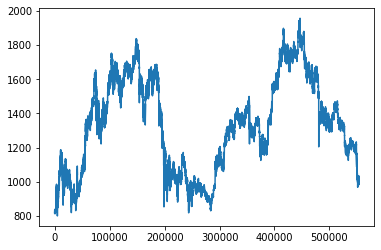

In [86]:
crypto_series.plot()

Before we do anything else, let's save the current time series in google drive.

In [30]:
crypto_series.to_csv("/content/drive/MyDrive/Colab Notebooks/Miscellaneous/Analyzing_crypto_prices/ts_BTC.csv")

Pending